In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

#Functions

In [2]:
def psi_unif(x,y):
    r = np.square(x) + np.square(y)
    
    exterior = r > 1  # Positions at which we are outside the circle
    interior = r <= 1 # Positions at which we are inside the circle
    
    z = np.zeros_like(x)
    z[exterior] = y[exterior]
    return z

In [3]:
def psi_source(x,y):
    r = np.square(x) + np.square(y)
    
    exterior = r > 1  # Positions at which we are outside the circle
    interior = r <= 1 # Positions at which we are inside the circle
    
    z = np.zeros_like(x)
    z[exterior] = np.arctan2(y[exterior], x[exterior])
    return z

In [4]:
xx   = np.linspace(-3, 3, 500)
yy   = np.linspace(-3, 3, 500)

x, y = np.meshgrid(xx, yy)

In [5]:
# circle

theta  = np.linspace(0, 2*np.pi, 100)
# radius = 1

x_circle   = np.cos(theta)
y_circle   = np.sin(theta)


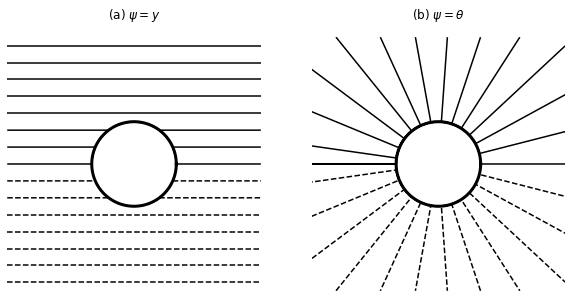

In [6]:
# Displaying circle

fig = plt.figure(figsize=(10,5))

#subplot 2
ax  = fig.add_subplot(121)

ax.set_aspect('equal')
ax.axis('off')

ax.set(title=r'(a) $\psi = y$')
ttl = ax.title
ttl.set_position([0.5, 1.05])

ax.contour(x, y, psi_unif(x,y), 15, colors='black')
ax.plot(x_circle, y_circle, 'k', linewidth = 3)

# -------------------------------------------------------

#subplot 2
ax  = fig.add_subplot(122)

ax.set_aspect('equal')
ax.axis('off')

# title
ttl = ax.title
ttl.set_position([0.5, 1.05])
ax.set(title=r'(b) $\psi = \theta$')

# plot
ax.contour(x, y, psi_source(x,y), 30, colors='black')
ax.plot(x_circle, y_circle, 'k', linewidth = 3)

### $\rhd$ Représentation des dipôles $\psi_\parallel$ et $\psi_\perp$

---

Représentons maintenant
\begin{equation}
\psi_\parallel = -\frac{y}{r^2}
\end{equation}
et
\begin{equation}
\psi_\perp = \frac{x}{r^2}
\end{equation}

In [7]:
def psi_parallel(x,y):
    r = np.square(x) + np.square(y)
    
    exterior = r > 1
    interior = r <= 1

    z = np.zeros_like(x)
    
    z[exterior] = -y[exterior]/r[exterior]
    z[interior] = np.ma.masked
    return z

In [8]:
def psi_perpendicular(x,y):
    r = np.square(x) + np.square(y)
    
    exterior = r > 1
    interior = r < 1
    
    z = np.zeros_like(x)
    
    z[exterior] = +x[exterior]/r[exterior]
    z[interior] = np.ma.masked
    return z

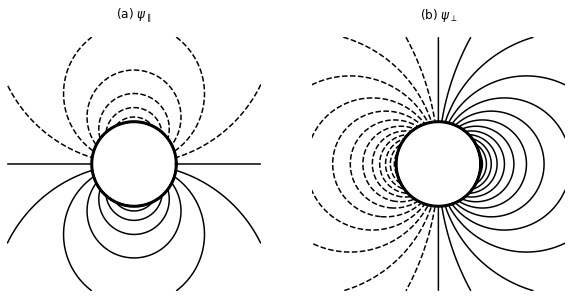

In [9]:
fig = plt.figure(figsize=(10,5))

# subplot 1
ax  = fig.add_subplot(121)

ax.set_aspect('equal')
ax.axis('off')

ax.set(title=r'(a) $\psi_\parallel$')
ttl = ax.title
ttl.set_position([0.5, 1.05])

# plot
ax.contour(x, y, psi_parallel(x,y), 15, colors='black')
ax.plot(x_circle, y_circle, 'k', linewidth = 3)

# ------------------------------------------------------

# subplot 2
ax  = fig.add_subplot(122)

ax.set_aspect('equal')
ax.axis('off')

ttl = ax.title
ttl.set_position([0.5, 1.05])
ax.set(title=r'(b) $\psi_\perp$')

# plot
ax.contour(x, y, psi_perpendicular(x,y), 30, colors='black')
ax.plot(x_circle, y_circle, 'k', linewidth = 3)

### $\rhd$ Écoulement autour du cylindre

---

L'écoulement autour du cylindre est la superposition du champ uniforme et d'un dipôle d'intensité $U R^2$ :

In [42]:
def psi_cyl(x, y, R, U):
    r = np.square(x) + np.square(y)
    
    exterior = r > R
    interior = r <= R

    z = np.zeros_like(x)
    z[exterior] = U*(y[exterior] - y[exterior]*(R / r[exterior])**2)
    z[interior] = np.ma.masked
    return z

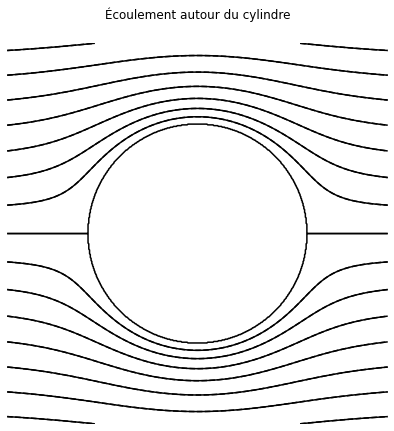

In [46]:
fig = plt.figure(figsize=(7,7))

U = 1
R = 3

ax  = fig.add_subplot(111)

ax.set_aspect('equal')
ax.axis('off')

ax.set(title=r'Écoulement autour du cylindre')
ttl = ax.title
ttl.set_position([0.5, 1.05])

# plot

# upper lines
ax.contour(x, y, psi_cyl(x, y, R, U), 15, colors='black')

# lower lines
ax.contour(x, -y, psi_cyl(x, y, R, U), 15, colors='black')

### $\rhd$ Écoulement autour du cylindre *aspirant*

---

In [62]:
def psi_cyl_aspi(x, y, uaspi, R, U):
    
    r = np.square(x) + np.square(y)
    
    exterior = r > R
    interior = r <= R

    z = np.zeros_like(x)
    z[exterior] = U*y[exterior] - U*y[exterior]*((R / r[exterior])**2) - uaspi * R * np.arctan2(y[exterior], x[exterior]) # y[exterior]/rsq[exterior] = dipolar term
    #z[exterior] = y[exterior] - y[exterior]/r[exterior] - uaspi * np.arctan2(y[exterior],x[exterior]) # y[exterior]/rsq[exterior] = dipolar term
    z[interior] = np.ma.masked
    return z

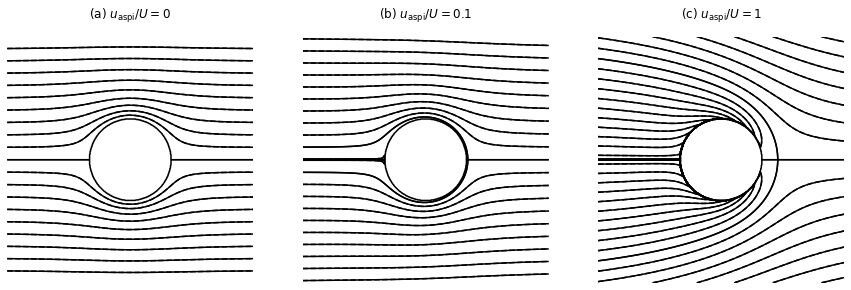

In [63]:
fig = plt.figure(figsize=(15,5))

R = 1
U = 1

contour_levels = np.linspace(-3,3,21)

# ----------------------------------------------------------------------

# subplot 1
ax  = fig.add_subplot(131)

# axis
ax.set_aspect('equal')
ax.axis('off')

# title
ax.set(title=r'(a) $u_\mathrm{aspi}/U = 0$')
ttl = ax.title
ttl.set_position([0.5, 1.05])

# plot
ax.contour(x, y, psi_cyl_aspi(x, y, U*0, R, U), 15, colors='black', levels = contour_levels)
ax.contour(x, -y, psi_cyl_aspi(x, y, U*0, R, U), 15, colors='black', levels = contour_levels)

# ----------------------------------------------------------------------

# subplot 2
ax  = fig.add_subplot(132)

# axis
ax.set_aspect('equal')
ax.axis('off')

# title
ttl = ax.title
ttl.set_position([0.5, 1.05])
ax.set(title=r'(b) $u_\mathrm{aspi}/U = 0.1$')

# plot
ax.contour(x, y, psi_cyl_aspi(x, y, U*0.1, R, U), 30, colors='black', levels = contour_levels)
ax.contour(x, -y, psi_cyl_aspi(x, y, U*0.1, R, U), 30, colors='black', levels = contour_levels)

# ----------------------------------------------------------------------

# subplot 3
ax  = fig.add_subplot(133)

# axis
ax.set_aspect('equal')
ax.axis('off')

# title
ttl = ax.title
ttl.set_position([0.5, 1.05])
ax.set(title=r'(c) $u_\mathrm{aspi}/U = 1$')

# plot
ax.contour(x, y, psi_cyl_aspi(x, y, U*1, R, U), 30, colors='black', levels = contour_levels)
ax.contour(x, -y, psi_cyl_aspi(x, y, U*1, R, U), 30, colors='black', levels = contour_levels)

# **3 - Diffusion confinée**


In [65]:
def concentration(x, t, D, M, pos_source):
    z = M / np.sqrt(4. * np.pi * D * t) * np.exp(-np.square(x - pos_source)/(4. * D * t))
    return z

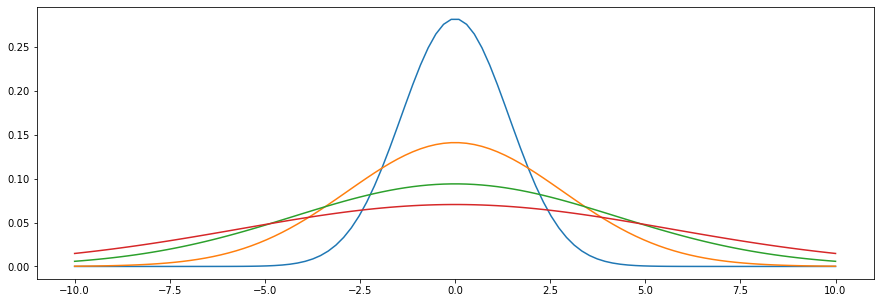

In [80]:
# general graph of the gaussian function

fig = plt.figure(figsize=(15,5))

N = 100
x = np.linspace(-10, 10, N)

D = 1 # width of the gaussian function # the bigger, the faster the spread
M = 1 # initial qtty of color for instance

for i in range(1, 5):
    plt.plot(x, concentration(x, i**2, D, M, pos_source= 0))

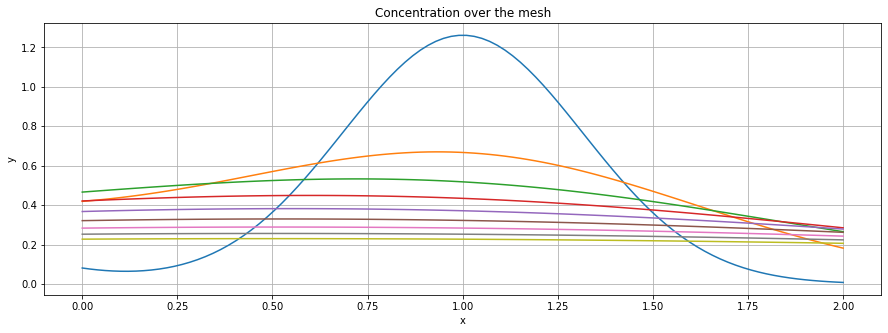

In [81]:
# Same graph but for an offseted source and a lower time
# we furthermore define a range of study from 0 to L --> no flux boundary cd°

fig = plt.figure(figsize=(15,5))

L = 2
x = np.linspace(0, L, N)

D = 1 # width of the gaussian function # the bigger, the faster the spread
M = 1 # initial qtty of color for instance

for i in range(1, 10):
    plt.plot(x, concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= 1) + concentration(x, t = 0.1*i**2, D = 1, M = 1, pos_source= -1))
    
plt.title('Concentration over the mesh')
plt.xlabel('x')
plt.ylabel('y')

plt.grid('True')

The flux is spreading to the right only - no flux BC to the left. In fact, what is diffused by this gaussian to the left is given back by the fictive concentration to its left.

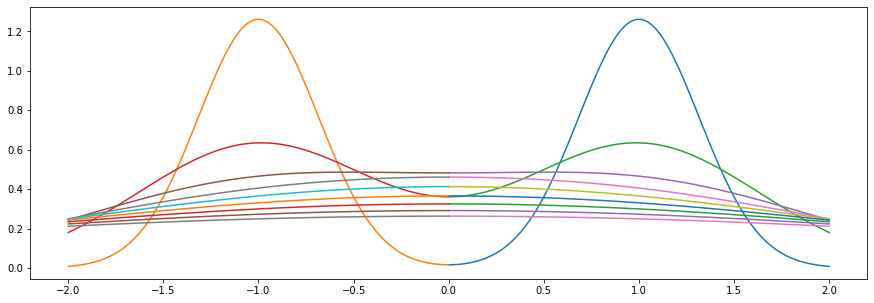

In [90]:
fig = plt.figure(figsize=(15,5))

for i in range(1, 10):
    plt.plot(x, concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= 1) + concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= -1))
    plt.plot(-x, concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= 1) + concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= -1))

### $\rhd$ Diffusion en présence d'une paroi *absorbante*

---

In [83]:
def concentration(x, t, D, M, pos_source):
    z = M / np.sqrt(4. * np.pi * D * t) * (np.exp(-np.square(x - pos_source)/(4. * D * t)))
    return z

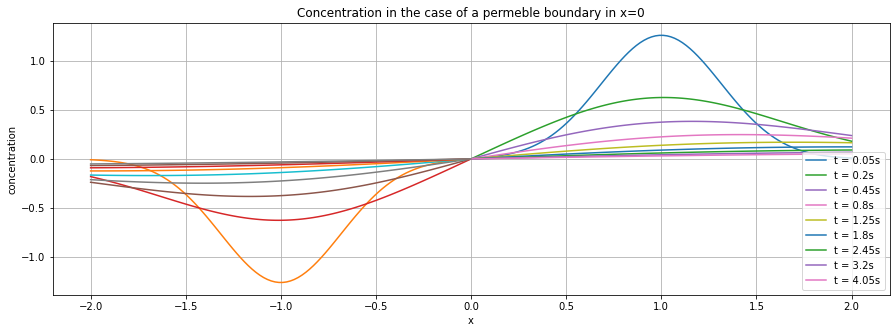

In [102]:
fig = plt.figure(figsize=(15,5))

list = []

for i in range(1, 10):
    list += plt.plot(x, concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=1) - concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=-1), label = 't = {}s'.format(0.05*i**2))
    plt.plot(-x, -(concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=1) - concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=-1)))


plt.title('Concentration in the case of a permeble boundary in x=0')    
plt.xlabel('x')
plt.ylabel('concentration')

plt.legend(loc=4)
                     
plt.grid('True')

We recall that the left hand side figure stands for the model and helps to build the sought model (permeable boundary). In the fact, we only study the right hand figure ($x \geq 0$).

### $\rhd$ Bonus - Diffusion en présence de 2 parois *absorbantes*

---

In [83]:
def concentration(x, t, D, M, pos_source):
    z = M / np.sqrt(4. * np.pi * D * t) * (np.exp(-np.square(x - pos_source)/(4. * D * t)))
    return z

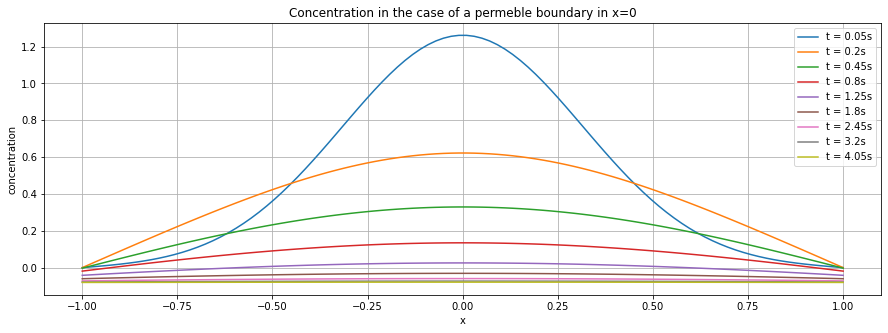

In [119]:
fig = plt.figure(figsize=(15,5))

list = []

l = 1
x = np.linspace(-l, +l, N)

# ----------------------------------------------------------------------

for i in range(1, 10):
    list += plt.plot(x,  - concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=-2*l) + concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=0) - concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source=2*l), label = 't = {}s'.format(0.05*i**2))

plt.title('Concentration in the case of a permeble boundary in x=0')    
plt.xlabel('x')
plt.ylabel('concentration')

plt.legend(loc=1)
                     
plt.grid('True')

We should get 0 concentration at left and right boundaries. Anyway, we notice that the concentration isn't either constant in $x = \pm l$ nor equal to zero.

We have a visual representation of why the addition of 3 elementary solutions can't lead to the sought model, i.e. impermeable boundaries.

### $\rhd$ Diffusion en présence de 2 parois *impérméables*

---

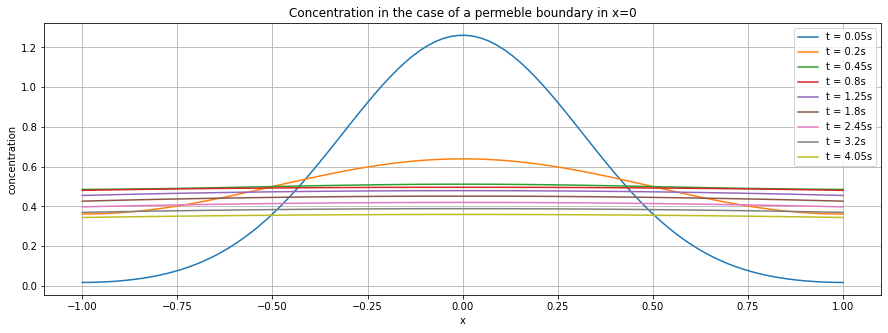

In [124]:
# Case with 3 singular solutions

fig = plt.figure(figsize=(15,5))

list = []

l = 1
x = np.linspace(-l, +l, N)

# ----------------------------------------------------------------------

for i in range(1,10):
    list += plt.plot(x, concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= -2*l) + concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source=0) + concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= +2*l), label = 't = {}s'.format(0.05*i**2))

plt.title('Concentration in the case of a permeble boundary in x=0')    
plt.xlabel('x')
plt.ylabel('concentration')

plt.legend(loc=1)
                     
plt.grid('True')

In [126]:
print(np.shape(concentration(x, t = 0.05*i**2, D = 1, M = 1, pos_source= -2*l)))

(100,)


In [173]:
# Flux calculation

# Data
M     = 1
D     = 1
l     = 1
coeff = (M/np.sqrt(4*np.pi*D*t)) * (1/(2*D*t))

# Point at time we test (flux null at x=-l and x=+l)
t     = 1
x     = l

# ----------------------------------------------------------------------

flux = 0

k    = 3 # 2*(k+1) values for the sum to ensure zero flux
interval  = np.arange(-k, k+1 +1) # +1 as python doesn't consider last value given

for j in interval:
    flux += (2*j*l - x)*np.exp(-(x-2*j*l)**2/(4*D*t))
    
if flux < 10**-10:
    print('The flux in {} is null'.format(x))
    print('Numerical flux = {:.2E}  ~= 0'.format(flux))
else:
    print('The flux isn\'t null in x={}'.format(x))

The flux in 1 is null
Numerical flux = 6.28E-17  ~= 0


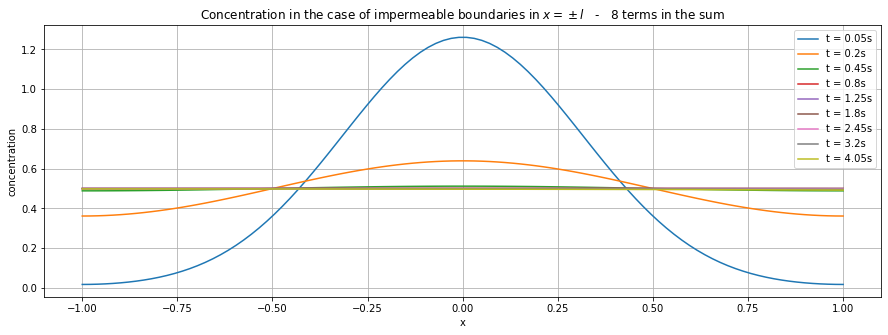

In [218]:
# Case with an infinity of singular solutions

fig = plt.figure(figsize=(15,5))

# label
list = []

# mesh
l = 1
x = np.linspace(-l, +l, N)

# number of curves
T = 10

# ----------------------------------------------------------------------

k    = 3 # 2*(k+1) values for the sum to ensure zero flux
interval  = np.arange(-k, k+1 +1) # +1 as python doesn't consider last value given

mean_concentration = np.zeros(T)

for i in range(1,T):
    
    concentration_infinity = np.zeros(N) 
    
    for j in interval:
        concentration_infinity += concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source= -2*j*l)
    
    mean_concentration[i] = sum(concentration_infinity)/len(concentration_infinity)
    plt.plot(x, concentration_infinity, label = 't = {}s'.format(0.05*i**2))

plt.title(r'Concentration in the case of impermeable boundaries in $x= \pm l$   -   {} terms in the sum'.format(2*(k+1)))    
plt.xlabel('x')
plt.ylabel('concentration')

plt.legend(loc=1)
                     
plt.grid('True')

#### 12 - Asymptotic value

[0.         0.49517001 0.49861461 0.4998822  0.49999627 0.49999752
 0.49994262 0.4995939  0.49848541 0.49611954]


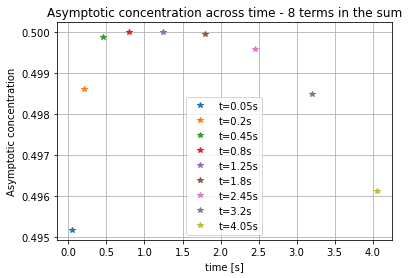

In [220]:
# Mean value for the concentration

print(mean_concentration)

for i in range(1,T):
    plt.plot(0.05*i**2, mean_concentration[i], '*', label = r't={}s'.format(0.05*i**2))
    
plt.title(r'Asymptotic concentration across time - {} terms in the sum'.format(2*(k+1)))    
plt.xlabel('time [s]')
plt.ylabel('Asymptotic concentration')

plt.legend(loc=8)
                     
plt.grid('True')

The asymptotic value of the concentration must remain constant. Then, if it diminishes of a too high value (to be evaluated a priori), it's that we did not consider enough terms in the sum.

Here below the same graph but with 20 terms :

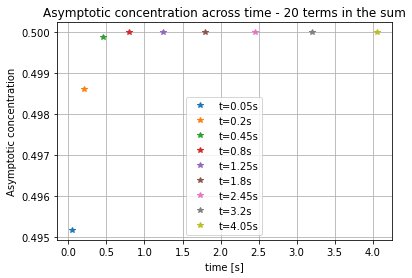

In [222]:
# Same graph with more terms in the sum

k    = 9 # 2*(k+1) = 20 values for the sum to ensure zero flux
interval  = np.arange(-k, k+1 +1) # +1 as python doesn't consider last value given

mean_concentration = np.zeros(T)

for i in range(1,T):
    
    concentration_infinity = np.zeros(N) 
    
    for j in interval:
        concentration_infinity += concentration(x, t=0.05*i**2, D = 1, M = 1, pos_source= -2*j*l)
    
    mean_concentration[i] = sum(concentration_infinity)/len(concentration_infinity)

# ----------------------------------------------------------------------

plt.figure()

for i in range(1,T):
    plt.plot(0.05*i**2, mean_concentration[i], '*', label = r't={}s'.format(0.05*i**2))
    
plt.title(r'Asymptotic concentration across time - {} terms in the sum'.format(2*(k+1)))    
plt.xlabel('time [s]')
plt.ylabel('Asymptotic concentration')

plt.legend(loc=8)
                     
plt.grid('True')

In [ ]:
We see that the asymptotic value now is 